## Reducing dimensionality and clustering

In [59]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Load and process 2D arrays

In [81]:
class patient:
    def __init__(self, patient_id, name, array):
        self.id = patient_id
        self.name = name
        self.array = array
        self.cluster = None

In [ ]:
# Define the folder containing the CSV files
input_folder = '../output/raw'
arrays = []
count=0
patients = []
for filename in os.listdir(input_folder):
    if filename.endswith('.csv'):
        if 'S1' in filename:
            filepath = os.path.join(input_folder, filename)
            array = np.loadtxt(filepath, delimiter=',')
            arrays.append(array)
            patients.append(patient(patient_id=count, name=filename, array=array))
            count += 1

In [85]:
# print all attributes of the first patient
print("Patient ID:", patients[0].id)
print("Patient Name:", patients[0].name)
print("Patient Array:", patients[0].array)

Patient ID: 0
Patient Name: DD01S1EC-edf.csv
Patient Array: [[1.00000000e+00 1.00000000e+00 0.00000000e+00 1.21067349e-02
  1.21067349e-02 8.03566136e-03 8.03566136e-03 9.78757301e-04
  9.78757301e-04 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 0.00000000e+00 1.09686347e-01
  1.09686347e-01 8.93602348e-02 8.93602348e-02 3.11861197e-02
  3.11861197e-02 0.00000000e+00]
 [4.00305280e-01 4.00305280e-01 6.41905096e-01 5.52740380e-01
  5.52740380e-01 7.90858214e-01 7.90858214e-01 6.68917069e-01
  6.68917069e-01 5.34284845e-01]
 [3.90114749e-01 3.90114749e-01 6.54389060e-01 5.03424372e-01
  5.03424372e-01 7.71061600e-01 7.71061600e-01 7.40307487e-01
  7.40307487e-01 5.68538125e-01]
 [3.79022228e-01 3.79022228e-01 6.31309162e-01 6.02033765e-01
  6.02033765e-01 7.82545628e-01 7.82545628e-01 5.92128847e-01
  5.92128847e-01 4.04345056e-01]
 [3.75985917e-01 3.75985917e-01 6.67409997e-01 4.83691897e-01
  4.83691897e-01 7.40976315e-01 7.40976315e-01 7.67736510e-01
  7.67736510e-01 4.93602900e-01

### Flatten and reduce dimensionality

In [47]:
# Flatten each 2D array into a 1D array
flattened_arrays = [array.flatten() for array in arrays]

# Reduce dimensionality using PCA
pca = PCA()  # Adjust the number of components as needed
reduced_data = pca.fit_transform(flattened_arrays)
len(reduced_data[0])

52

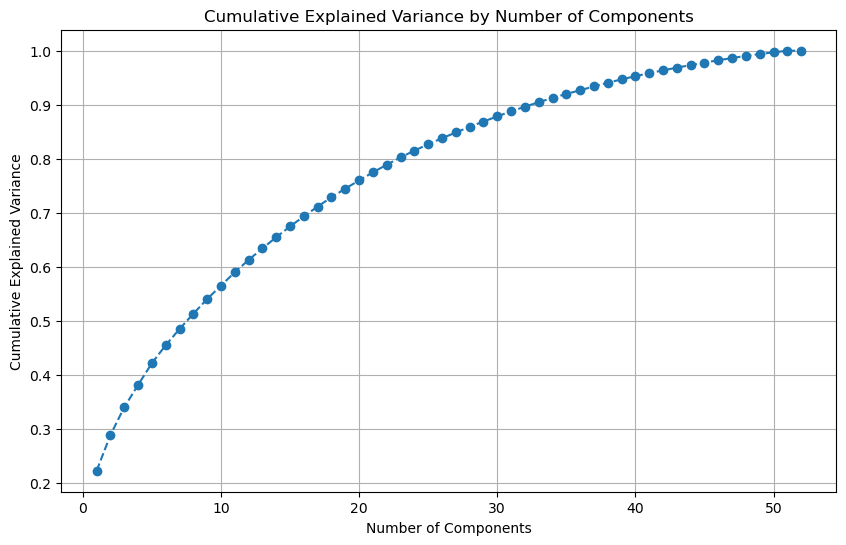

In [48]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [49]:
# Set a threshold (e.g., 95%)
threshold = 0.95

# Find the number of components
num_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Number of components to retain {threshold*100}% variance: {num_components}")

Number of components to retain 95.0% variance: 40


In [50]:
pca = PCA(n_components=num_components)  # Adjust the number of components as needed
reduced_data = pca.fit_transform(flattened_arrays)

### Clustering with k-means

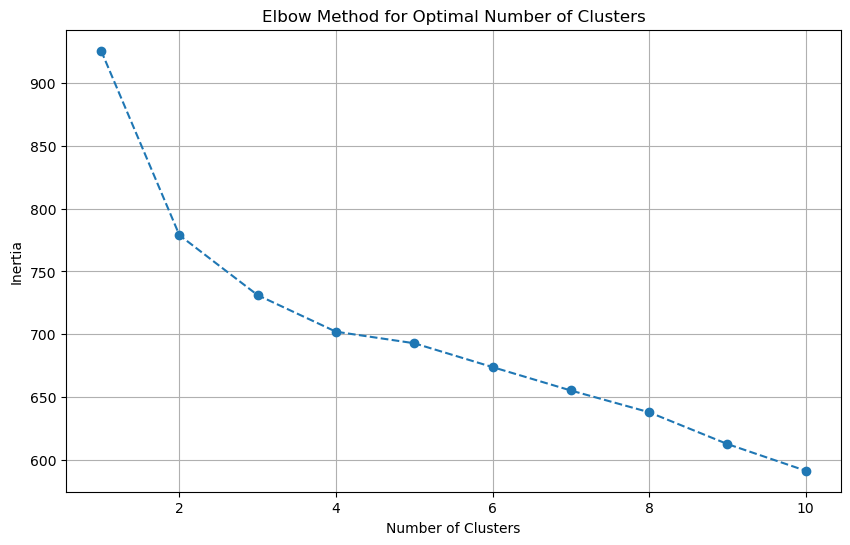

In [60]:
flattened_arrays = [array.flatten() for array in arrays]
# Use the Elbow Method to find the optimal number of clusters
inertia = []
cluster_range = range(1, 11)  # Test cluster sizes from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(flattened_arrays)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [61]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

In [77]:
#add cluster to each patient in patient_index
for i, patient in enumerate(patient_index.keys()):
    patient_index[patient] = (patient_index[patient], clusters[i])

In [78]:
patient_index

{'DD01S1EC-edf.csv': (0, np.int32(0)),
 'DD02S1EC-edf.csv': (1, np.int32(0)),
 'DD03S1EC-edf.csv': (2, np.int32(2)),
 'DD04S1EC-edf.csv': (3, np.int32(1)),
 'DD05S1EC-edf.csv': (4, np.int32(1)),
 'DD06S1EC-edf.csv': (5, np.int32(0)),
 'DD07S1EC-edf.csv': (6, np.int32(1)),
 'DD08S1EC-edf.csv': (7, np.int32(0)),
 'DD09S1EC-edf.csv': (8, np.int32(2)),
 'DD11S1EC-edf.csv': (9, np.int32(1)),
 'DD12S1EC-edf.csv': (10, np.int32(0)),
 'DD13S1EC-edf.csv': (11, np.int32(0)),
 'DD14S1EC-edf.csv': (12, np.int32(0)),
 'DD15S1EC-edf.csv': (13, np.int32(2)),
 'DD16S1EC-edf.csv': (14, np.int32(0)),
 'DD17S1EC-edf.csv': (15, np.int32(0)),
 'DD18S1EC-edf.csv': (16, np.int32(1)),
 'DD19S1EC-edf.csv': (17, np.int32(0)),
 'DD20S1EC-edf.csv': (18, np.int32(0)),
 'DD21S1EC-edf.csv': (19, np.int32(0)),
 'DD22S1EC-edf.csv': (20, np.int32(1)),
 'DD23S1EC-edf.csv': (21, np.int32(0)),
 'DD24S1EC-edf.csv': (22, np.int32(1)),
 'DD25S1EC-edf.csv': (23, np.int32(1)),
 'DD26S1EC-edf.csv': (24, np.int32(1)),
 'DD27S1EC

### Dimensionality reduction with TSNE

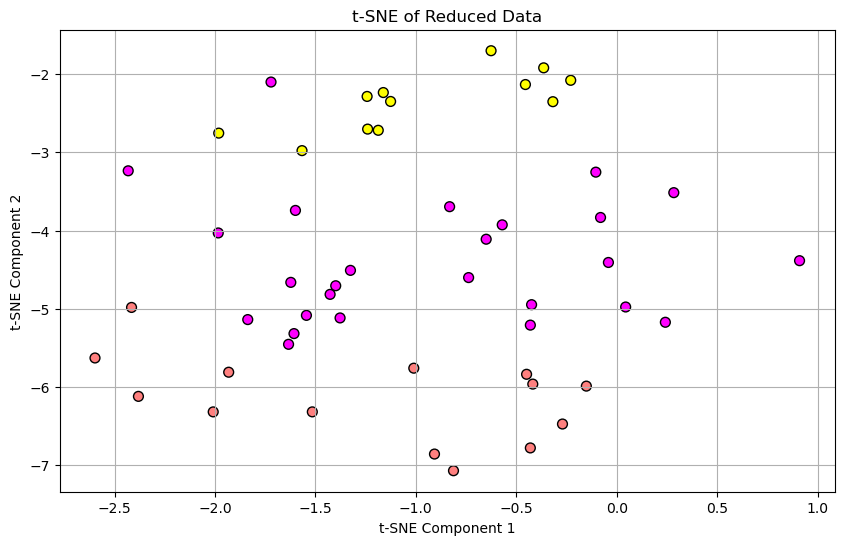

In [73]:
# Reduce dimensionality using TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
flattened_ndarray = np.array(flattened_arrays)
reduced_data_tsne = tsne.fit_transform(flattened_ndarray)
# Plot the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=clusters, cmap='spring', marker='o', edgecolor='k', s=50)
plt.title('t-SNE of Reduced Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

### Perform k-means clustering

### Visualize the clustering results

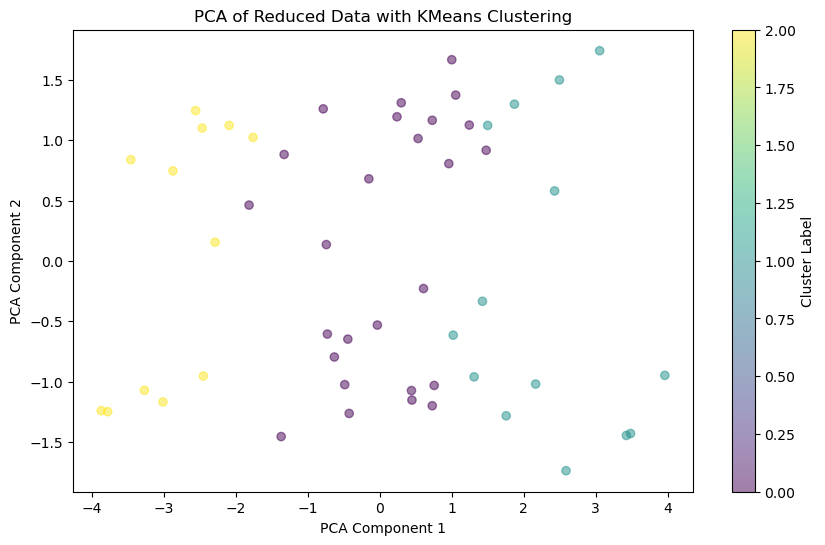

In [55]:
# Plot the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('PCA of Reduced Data with KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()